In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier 
from xgboost import plot_importance 

In [3]:
# Set Pandas to display all columns in output
pd.set_option('display.max_columns', None)

In [4]:
# Import data
df0 = pd.read_csv('BankChurners.csv')

# Preview dataframe 
df0.head() 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# Print the number of missing values for each column
df0.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
# Print the total number of duplicated entries 
df0.duplicated().sum()

0

In [7]:
# Drop the 'CLIENTNUM' and 'Gender' columns
df0.drop(['CLIENTNUM', 'Gender'], axis=1, inplace=True)

In [8]:
# Change the uppercase letters to lowercase 
df0.columns = df0.columns.str.lower()
df0.head()

,attrition_flag,customer_age,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
# Check all columns for 'Unknown' 
for column_name in df0.columns:
    has_unknown = (df0[column_name]=='Unknown').any()
    if has_unknown:
        print(f'{column_name} contains unknown values: {has_unknown}')
    else:
        pass 

education_level contains unknown values: True
marital_status contains unknown values: True
income_category contains unknown values: True


In [10]:
# Get the percentage of existing vs attrited customers 
df0['attrition_flag'].value_counts(normalize=True)

attrition_flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [11]:
# Get the number of existing and attrited customers 
df0['attrition_flag'].value_counts()

attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [12]:
# Assign to a variable a list of indices in the DataFrame where there is an 'Unknown'
rows_to_drop = df0[df0[['education_level', 'marital_status', 'income_category']].isin(['Unknown']).any(axis=1)].index 

# Drop rows with 'Unknown' 
df1 = df0.drop(index=rows_to_drop).reset_index(drop=True)

In [13]:
# Get the percentage of existing vs attrited customers 
print(df1['attrition_flag'].value_counts(normalize=True))

# Get the number of existing and attrited customers 
print(df1['attrition_flag'].value_counts())

attrition_flag
Existing Customer    0.842819
Attrited Customer    0.157181
Name: proportion, dtype: float64
attrition_flag
Existing Customer    5968
Attrited Customer    1113
Name: count, dtype: int64


In [14]:
# Display data summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            7081 non-null   object 
 1   customer_age              7081 non-null   int64  
 2   dependent_count           7081 non-null   int64  
 3   education_level           7081 non-null   object 
 4   marital_status            7081 non-null   object 
 5   income_category           7081 non-null   object 
 6   card_category             7081 non-null   object 
 7   months_on_book            7081 non-null   int64  
 8   total_relationship_count  7081 non-null   int64  
 9   months_inactive_12_mon    7081 non-null   int64  
 10  contacts_count_12_mon     7081 non-null   int64  
 11  credit_limit              7081 non-null   float64
 12  total_revolving_bal       7081 non-null   int64  
 13  avg_open_to_buy           7081 non-null   float64
 14  total_am

In [15]:
# Generate descriptive statistics for quantitative variables 
df1.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


In [16]:
# Display total revolving balance grouped by customer attrition  
grouped_df0 = df1.groupby('attrition_flag')['total_revolving_bal'].agg(['mean', 'median'])
grouped_df0

,mean,median
attrition_flag,,
Attrited Customer,668.353998,0.0
Existing Customer,1260.589980,1365.0


In [17]:
# Display average utilization ratio grouped by customer attrition
grouped_df1 = df1.groupby('attrition_flag')['avg_utilization_ratio'].agg(['mean', 'median'])
grouped_df1

,mean,median
attrition_flag,,
Attrited Customer,0.163571,0.0000
Existing Customer,0.304458,0.2235


In [18]:
# Display total amount change from Q4 to Q1 grouped by customer attrition
grouped_df2 = df1.groupby('attrition_flag')['total_amt_chng_q4_q1'].agg(['mean', 'median'])
grouped_df2

,mean,median
attrition_flag,,
Attrited Customer,0.692021,0.698
Existing Customer,0.773370,0.742


In [19]:
# Display contacts count in the last 12 months grouped by customer attrition
grouped_df3 = df1.groupby('attrition_flag')['contacts_count_12_mon'].agg(['mean', 'median'])
grouped_df3

,mean,median
attrition_flag,,
Attrited Customer,2.950584,3.0
Existing Customer,2.361930,2.0


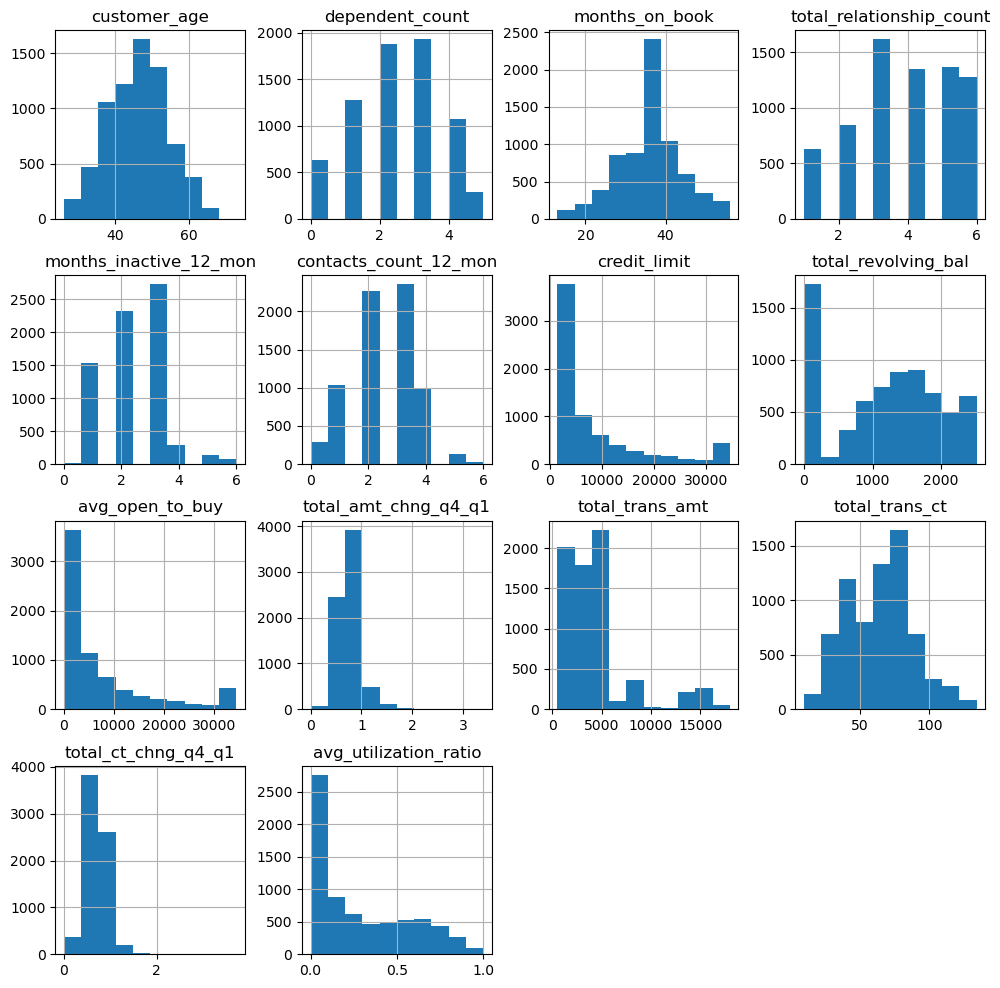

In [20]:
# Visualize feature distributions
df1.hist(figsize=(12, 12))
plt.show()

C:\Users\shara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


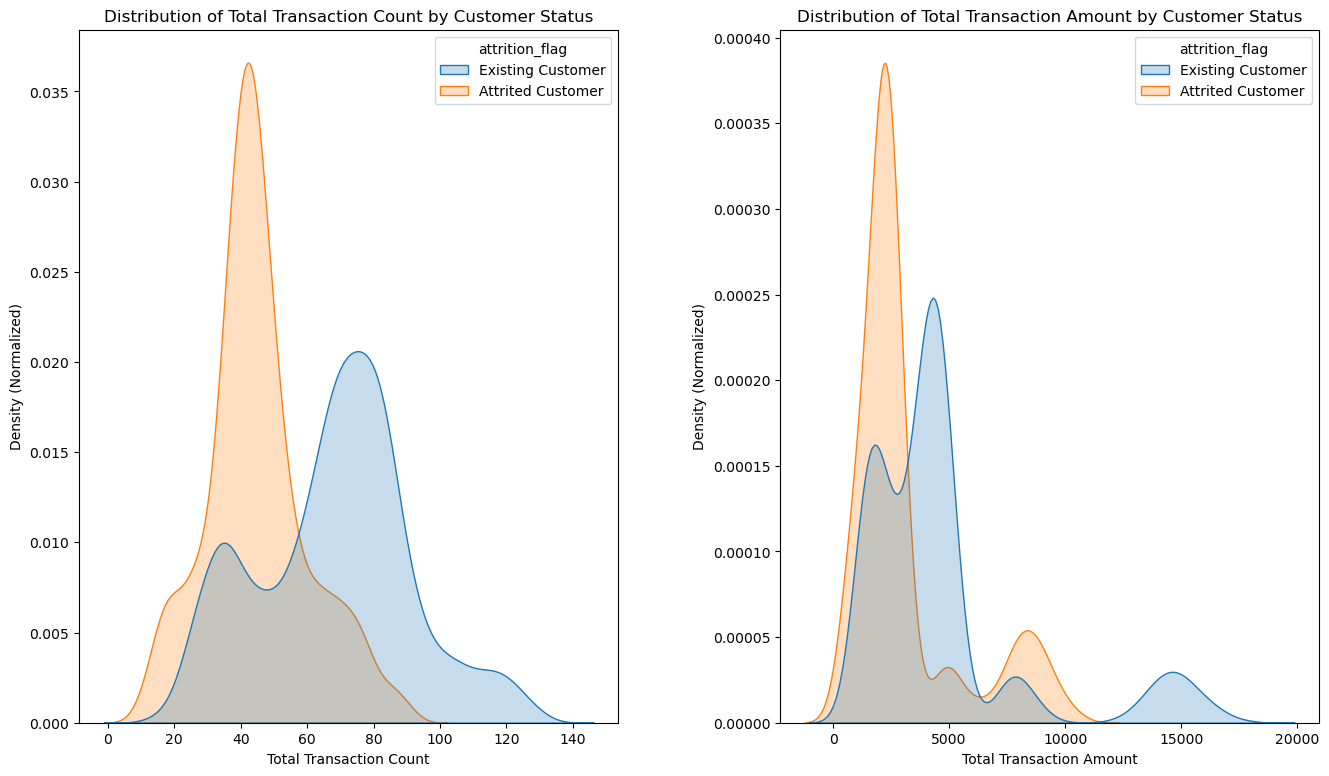

In [24]:
# Generate a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

# Generate a density plot of total_trans_ct grouped by attrition_flag
sns.kdeplot(data=df1, x='total_trans_ct', hue='attrition_flag', 
            fill=True, common_norm=False, ax=axs[0])
axs[0].set_title('Distribution of Total Transaction Count by Customer Status')
axs[0].set_xlabel('Total Transaction Count')
axs[0].set_ylabel('Density (Normalized)')

# Generate a density plot of total_trans_amt grouped by attrition_flag
sns.kdeplot(data=df1, x='total_trans_amt', hue='attrition_flag', 
            fill=True, common_norm=False, ax=axs[1])
axs[1].set_title('Distribution of Total Transaction Amount by Customer Status')
axs[1].set_xlabel('Total Transaction Amount')
axs[1].set_ylabel('Density (Normalized)')

# Adjust spacing between subplots for better readability
plt.subplots_adjust(wspace=0.3)

plt.show()

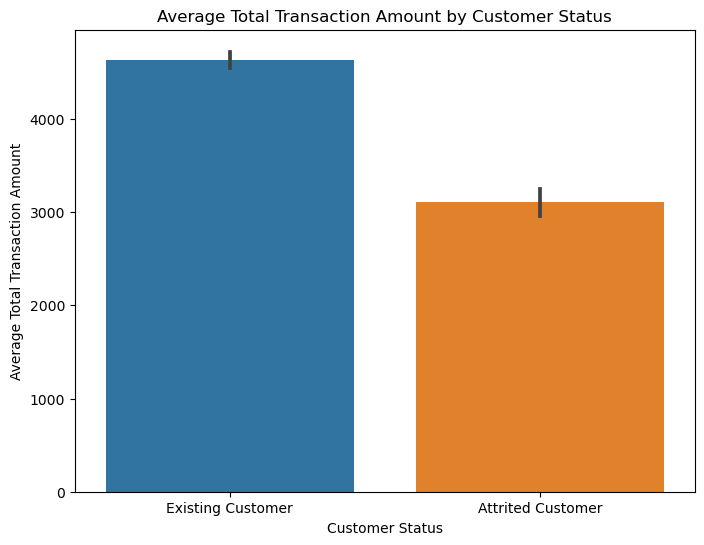

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='attrition_flag', y='total_trans_amt')
plt.title('Average Total Transaction Amount by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Average Total Transaction Amount')
plt.show()

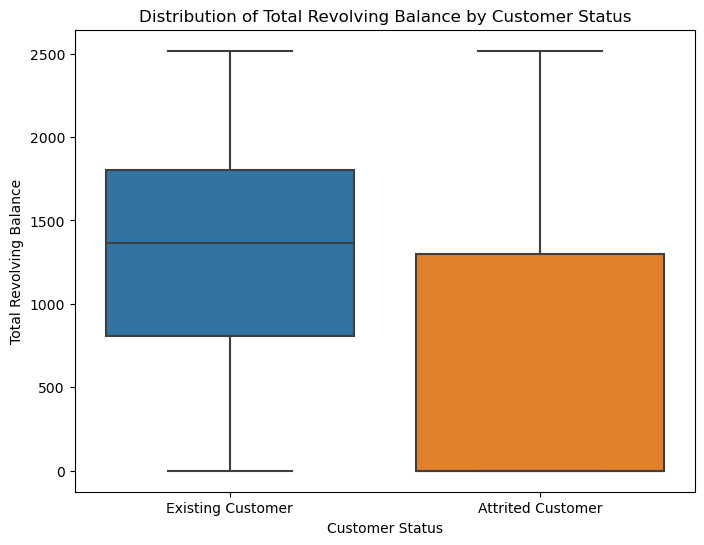

In [27]:
# Box plot of total revolving balance by customer attrition status:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='attrition_flag', y='total_revolving_bal')
plt.title('Distribution of Total Revolving Balance by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Total Revolving Balance')
plt.show()

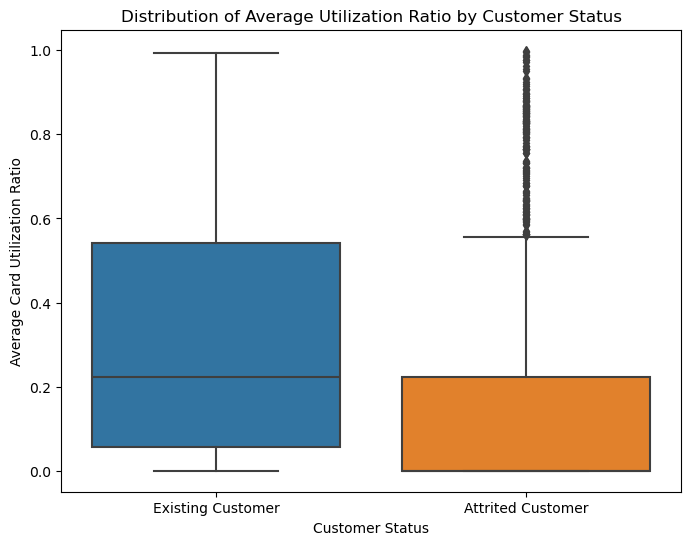

In [28]:
# Box plot of average utilization ratio by customer attrition status:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='attrition_flag', y='avg_utilization_ratio')
plt.title('Distribution of Average Utilization Ratio by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Average Card Utilization Ratio')
plt.show()

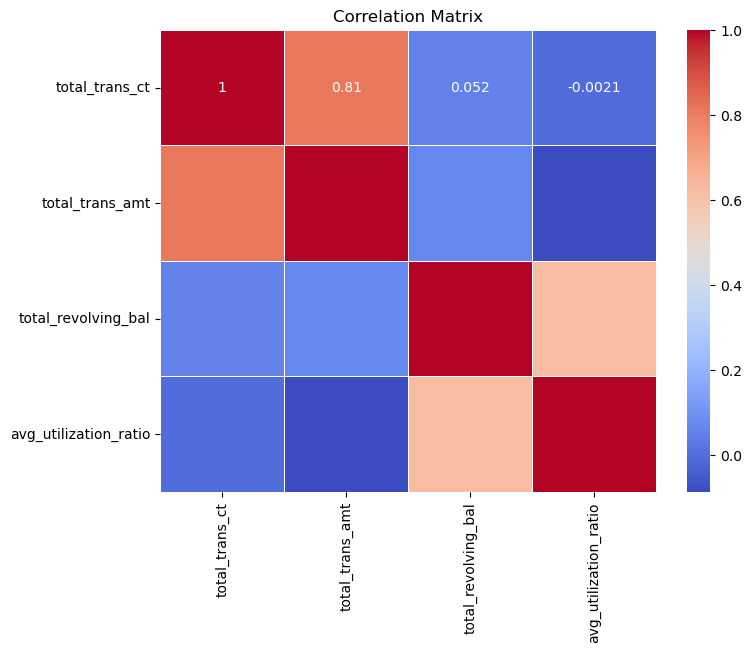

In [29]:
# Generate a heatmap of correlation matrix for selected columns:

plt.figure(figsize=(8, 6))
selected_columns = ['total_trans_ct', 'total_trans_amt', 'total_revolving_bal', 'avg_utilization_ratio']
corr_matrix = df1[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

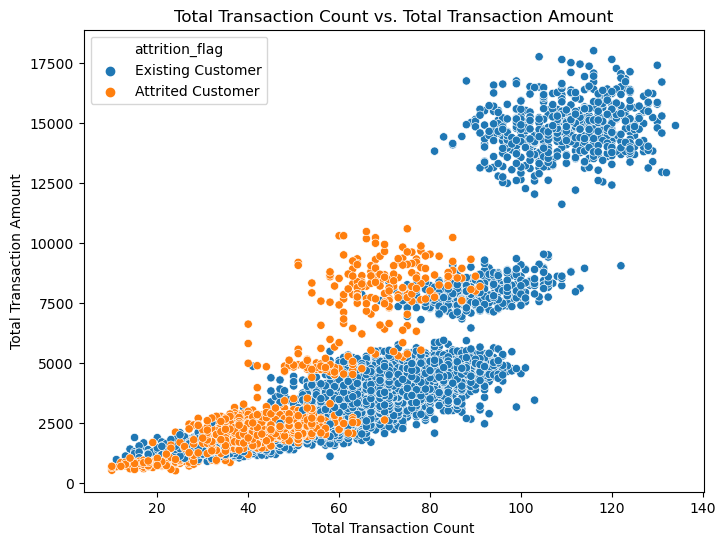

In [30]:
# Scatter plot of total transaction count vs. total transaction amount, colored by customer attrition status:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='total_trans_ct', y='total_trans_amt', hue='attrition_flag')
plt.title('Total Transaction Count vs. Total Transaction Amount')
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount')
plt.show()

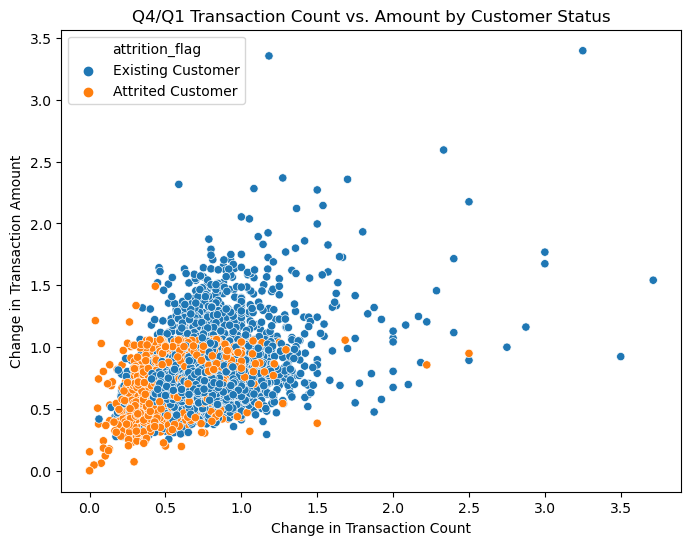

In [31]:
# Scatter plot of change in transaction count vs. change in transaction amount, colored by customer attrition status:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='total_ct_chng_q4_q1', y='total_amt_chng_q4_q1', hue='attrition_flag')
plt.title('Q4/Q1 Transaction Count vs. Amount by Customer Status')
plt.xlabel('Change in Transaction Count')
plt.ylabel('Change in Transaction Amount')
plt.show()

In [32]:
# Create a new column 'avg_amt_per_trans'
df1['avg_amt_per_trans'] = df1['total_trans_amt'] / df1['total_trans_ct']

In [33]:
# Dummy encode categorical features
df2 = pd.get_dummies(df1, dtype=int, drop_first=True)

In [34]:
df2.rename(columns={'attrition_flag_Existing Customer': 'attrition_flag'}, inplace=True)

In [35]:
if df2['attrition_flag'].iloc[0] == 1: 
    df2['attrition_flag'] = df2['attrition_flag'].replace({0: 1, 1: 0})
else:
    pass 

# Ensure that the first few rows of 'attrition_flag' are 0s (1 means attrited or churned)
df2.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,avg_amt_per_trans,attrition_flag,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Married,marital_status_Single,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Gold,card_category_Platinum,card_category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,27.238095,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,39.121212,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,94.350000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,29.142857,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
4,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,45.333333,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [36]:
# Define the target variable
y = df2['attrition_flag']

# Define the predictor variables
X = df2.copy()
X = X.drop('attrition_flag', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

In [37]:
# Instantiate the XGBClassifier model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Define hyperparameters
cv_params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Define scoring metrics for evaluation
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform hyperparameter tuning with cross-validation
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='f1')

# Fit the grid search to find the best hyperparameters
xgb_cv.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [38]:
# Print the best hyperparameters and corresponding performance
print("Best Parameters:", xgb_cv.best_params_)
print("Best F1 Score:", xgb_cv.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150}
Best F1 Score: 0.8877611465078102


In [42]:
def cv_scores(model_name: str, model_object):
    
    # Convert cross-validation results to a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_ )

    # Select the best estimator based on the highest mean test F1 score 
    best_estimator = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Create variables for the scoring values to be used when constructing the data frame 
    accuracy = best_estimator.mean_test_accuracy 
    precision = best_estimator.mean_test_precision 
    recall = best_estimator.mean_test_recall 
    f1 = best_estimator.mean_test_f1

    # Create a dataframe with cross-validation performance metrics 
    table = pd.DataFrame({'Model': [model_name], 
                          'Accuracy': [accuracy], 
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1]
                          })
    
    return table 

In [43]:
# Generate a dataframe with xgboost cross-validation results 
xgb_cv_results = cv_scores('XGBoost CV', xgb_cv)
xgb_cv_results 

,Model,Accuracy,Precision,Recall,F1
0,XGBoost CV,0.965899,0.919492,0.858809,0.887761


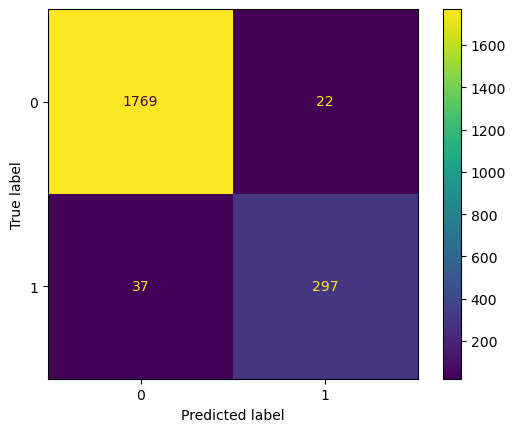

In [45]:
# Use XGBoost to model to predict on test data 
preds = xgb_cv.best_estimator_.predict(X_test)

# Create confusion matrix using predicted and actual values 
cm = confusion_matrix(y_test, preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot(values_format='');

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

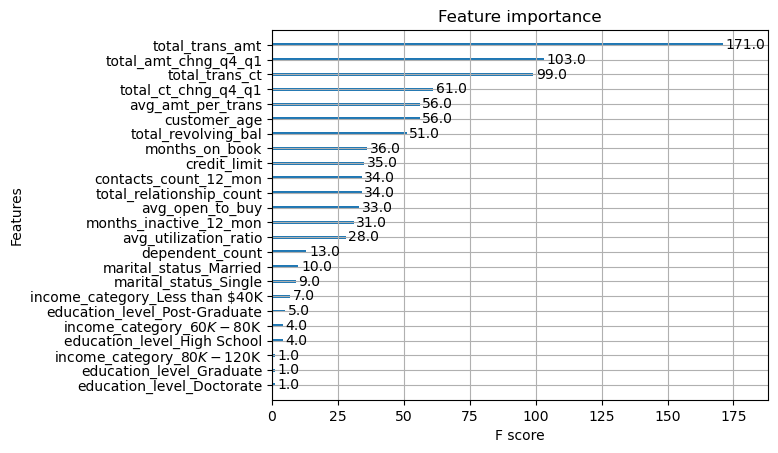

In [46]:
# Plot feature importances for XGBoost
plot_importance(xgb_cv.best_estimator_)